# **Logistic Regression** (sau Regresia Logistica)

![Grafic](figs/logreg.png "Regresie Logistica")

Creaza probabilitatea ca o anumita valoare, sa corespunda unei anumite categorii. Functia aceasta se modeleaza prin functia sigmoid care returneaza valori din intervalul $(0,1)$ pentru orice input $x$.
$$
s(x) = \frac{1}{1+e^{-x}}
$$
Astfel, estimarea probabilistica se poate obtine prin urmatoarea relatie, facand apel la ***regresia liniara***, servita in locul parametrului $x$:
$$
\hat{y}(x_{1},x_{2},...,x_{k})=\frac{1}{1+e^{-(w_{1}x_{1}+w_{2}x_{2}+...+w_{k}x_{k}+b)}}
$$
sau mai redus:
$$\hat{y}(X) = \frac{1}{1+e^{-(WX+b)}}$$
* $x_{i}$ - variabilele independente, caracteristicile date in problema care sunt corelate in rezultat
* $y$ - variabila dependenta, care este rezultatul problemei de regresie
* $w_{i}$ - (weights) coeficientii care descriu impactul fiecarei variabile -> care variabila are cea mai mare importanta
* $b$ - (bais) tendinta sistemului de a fi, fara vre-un impact al unei caracteristici.

### Invatarea parametrilor $w_{i}$ si $b$: **Gradient Descent**
Pentru a obtine modelul matematic al trendului de date, se urmareste reglarea parametrilor $w_{i}$ si $b$, in asa fel incat pierderea $L$, numita si deviatie sau eroare, sa fie minima!

Spre deosebire de regresia liniara, functia de pierdere folosita este entropia incrucisata:
$$
L(W, b) = \frac{1}{N}\sum_{i=1}^{N}(y_{i}\cdot ln(\hat{y})+(1+y_{i})\cdot ln(1 - \hat{y}))
$$

Scopul nostru acum este de a minimiza functia de pierdere. In acest sens, se considera gradientul acestei functii, care depinde de coeficientii $w_{i}$ si $b$ ai fiecarui data-point.
$$
\nabla L(W, b) = \begin{bmatrix}
\frac{\partial L}{\partial W} \\
\\
\frac{\partial L}{\partial b}
\end{bmatrix}
$$
Notam astfel:
$$
dW=\frac{\partial L}{\partial W} = \frac{1}{N}\sum_{i=1}^{N}2X_{i}(\hat{y}_{i} - (WX_{i}+b)) = \boxed{\frac{2}{N}\sum_{i = 1}^{N}X_{i}(\hat{y}_{i} - y_{i})}
\\
db=\frac{\partial L}{\partial b} = \frac{1}{N}\sum_{i=1}^{N}2(\hat{y}_{i} - (WX_{i}+b)) = \boxed{\frac{2}{N}\sum_{i = 1}^{N}(\hat{y}_{i} - y_{i})}
$$

Invatarea parametrilor $W$ si $b$, se realizeaza iterativ, urmarind reducerea acestora lor, raportata la directia pe care o da gradientul functiei de pierdere.
$$
W_{i+1}=W_{i}-\alpha\cdot dW_{i}\\
b_{i+1}=b_{i}-\alpha\cdot db_{i}
$$
$\alpha$ reprezinta rata de invatare, care indica granularitatea si pasul in care functia se apropie de valoarea sa minima. $\alpha$ se alege de regula ca fiind o valoare foarte mica, precum 0.001.

### **Algoritmul de antrenare**!
* initializam $W_{0}$ cu 0.
* initializam $b_{0}$ cu 0.
* pentru fiecare data point
    * se prezice $\hat{y}_{i}=WX_{i}+b$
    * calculam eroarea
    * coborare in gradient, actualizand $W$ si $b$.

In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [2]:
cancer = datasets.load_breast_cancer()
X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# plt.scatter(X[:, 0], y, color='b', marker='o')
# plt.show()

In [9]:
from logistic_regression import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

ImportError: cannot import name 'LogisticRegression' from 'logistic_regression' (c:\Users\andre\Desktop\STUFF\Teaching\IS-AC\Labs\lab3\logistic_regression.py)

In [ ]:
def accuracy(y_test, y_pred):
    return np.sum(y_pred == y_test) / len(y_test)

print(accuracy(y_test, y_pred))

55.533167031931804


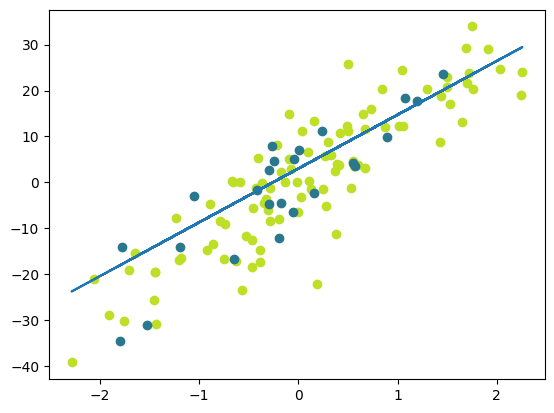

In [14]:
cmap = plt.get_cmap('viridis')
plt.scatter(X_train, y_train, color=cmap(0.9))
plt.scatter(X_test, y_test, color=cmap(0.4))

y_pred = linreg.predict(X)
plt.plot(X, y_pred)

plt.show()